In [188]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import os
import cPickle as pickle
from collections import Counter
from datetime import datetime
from shutil import copyfile
import platform
import scipy.stats
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import seaborn as sns

In [2]:
popularRoot = "/datasets/sagarj/vineData/Dataset/"
recentRoot = "/datasets/sagarj/vine2016/Dataset/"

graphDir = "/datasets/sagarj/vineGraphs/"

popUserDir = popularRoot + "UserTimeline/"
recentUserDir = popularRoot + "Users/"

In [3]:
def readJson(path):
    f = open(path)
    data = json.loads(f.read())
    return data

In [4]:
popFiles = [popUserDir + f for f in os.listdir(popUserDir)]

In [19]:
popFiles[1]

'/datasets/sagarj/vineData/Dataset/UserTimeline/938533347955728384.json'

In [7]:
recentFiles = [recentUserDir + f for f in os.listdir(recentUserDir)]

In [8]:
popTimeLine = [readJson(f) for f in popFiles]

In [24]:
popTimeLine[1]['error']

u''

In [74]:
type(popTimeLine[1]['data']['records'][1]['userId'])

int

In [166]:
popTimeLine[1]['data']['records'][1]['userId']

938533347955728384

In [167]:
def createGraph(timeLines):
    userGraph = nx.Graph()
    for t in  timeLines:
        if t['error'] == '':
            records = t['data']['records']
            
            for r in records:
                interactions = r['likes']['records'] + r['comments']['records']
                if not userGraph.has_node(r['userId']):
                    userGraph.add_node(r['userId'])
                dest = str(r['userId'])
                for i in interactions:

                    if not userGraph.has_edge(i['userId'],dest):
                        userGraph.add_edge(i['userId'], dest , weight=1 )
                    else:
                        userGraph[i['userId']][dest]['weight'] += 1
    return userGraph
                                          
                

In [168]:
popGraph = createGraph(popTimeLine)

In [169]:
len(popGraph.nodes())

352304

In [170]:
outdeg = popGraph.degree()
to_keep = [n for n in outdeg if outdeg[n] > 2]
filteredPop = popGraph.subgraph(to_keep)

In [179]:
print len(filteredPop.nodes())

31912


In [180]:
giant = max(nx.connected_component_subgraphs(filteredPop), key=len)

In [181]:
len(giant.nodes())

31600

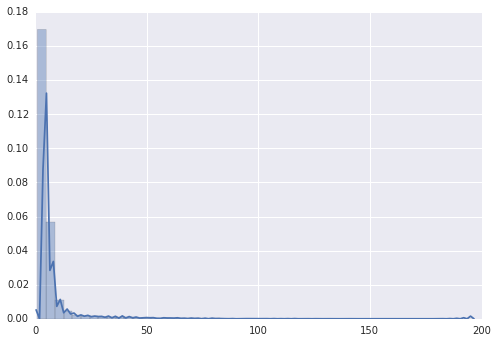

In [190]:
sns.set(color_codes=True)
sns.distplot(giant.degree().values());

In [173]:
# nx.write_gexf(filteredPop, "vineGraph.gexf")


In [153]:

# pos = graphviz_layout(popGraph, prog='neato')
# # pos = nx.spring_layout(filteredPop)
# fig, ax = plt.subplots()
# fig.set_size_inches(40, 30)
# nx.draw(filteredPop,pos=pos)
# plt.show()

In [174]:
rich_club = nx.rich_club_coefficient(filteredPop, normalized=True  , Q = 500 )

In [175]:
rich_coeff =  rich_club.values()

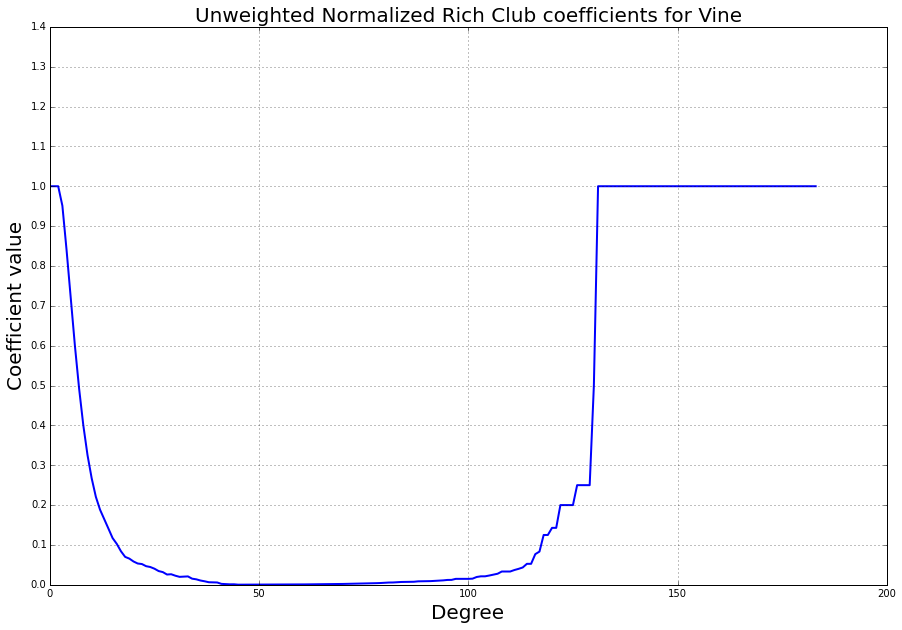

In [176]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.plot(rich_coeff,'b-',linewidth = 2.0)
plt.title("Unweighted Normalized Rich Club coefficients for Vine", fontsize = 20)
plt.xlabel("Degree",fontsize = 20)
plt.ylabel("Coefficient value",fontsize = 20)
plt.yticks(np.arange(0,1.5,0.1))
# plt.xticks(np.arange(0, ,1) , rotation=90)
plt.grid()
plt.show()

In [105]:
instaDir = "/datasets/sagarj/instaSample6000/meta/"

In [106]:
instaFiles = [instaDir + f for f in os.listdir(instaDir)]

In [107]:
instaTimeline = [readJson(f) for f in instaFiles]

In [109]:
instaMeta = "/datasets/sagarj/InstagramDataset_2016_seeded/InstaMeta.json"
instaMetaJson = readJson(instaMeta)

In [112]:
users = [ instaMetaJson[i]['meta']['Meta']['media']['owner']['id'] for i in instaMetaJson ]

In [114]:
len(list(set(users)))

1300

In [131]:
views = [float(instaMetaJson[i]['views'])+1 for i in instaMetaJson]

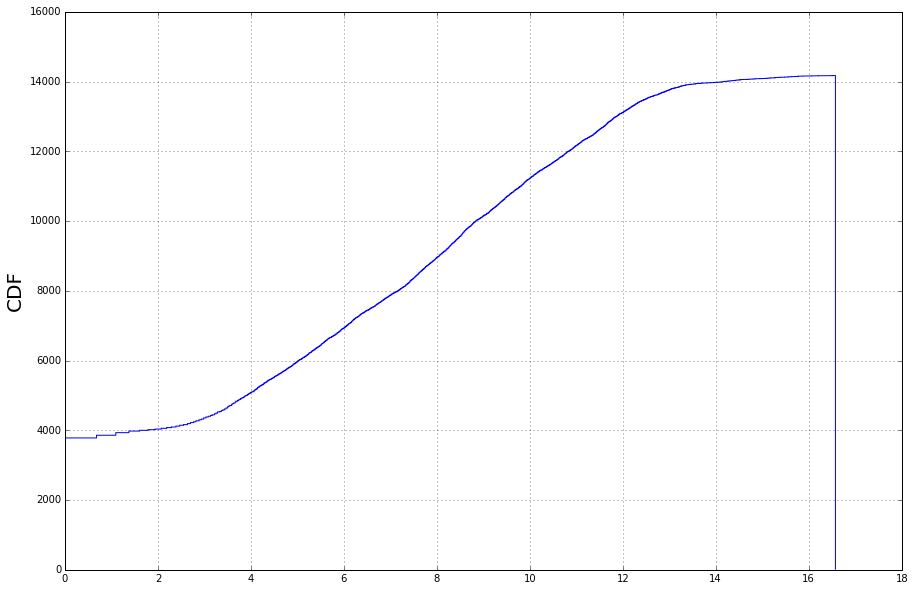

In [132]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(np.log(views), 1000, normed=0,histtype='step', cumulative=True,linewidth = 1.0)

plt.ylabel("CDF",fontsize = 20)

plt.grid()
plt.show()

In [141]:
top10percent = np.asarray(views).argsort()[-1500:][::-1]

In [142]:
views[top10percent[-1]]

104094.0

In [143]:
thresh = views[top10percent[-1]]

In [144]:
popMeta = [ instaMetaJson[i] for i in instaMetaJson if instaMetaJson[i]['views'] > thresh ]

In [145]:
len(popMeta)

1499

In [147]:
popMeta[1]

{u'length': u'59.815000',
 u'likes': 22430,
 u'meta': {u'Meta': {u'media': {u'caption': u'Scars\nfollow @talentvids for more! \U0001f497',
    u'caption_is_edited': False,
    u'code': u'BHK7TBbgPKa',
    u'comments': {u'count': 120,
     u'nodes': [{u'created_at': 1467174986.0,
       u'id': u'17848794922082658',
       u'text': u'@badsaturn',
       u'user': {u'id': u'1388250276',
        u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/14705123_375975626124749_6622948052715962368_a.jpg',
        u'username': u'nick_rodriguez457'}},
      {u'created_at': 1467183076.0,
       u'id': u'17848796947082658',
       u'text': u'@ra.fa.na if I were a magician, this would be my go-to trick',
       u'user': {u'id': u'1939864804',
        u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/13181269_1531607447147388_1976269717_a.jpg',
        u'username': u'farhanalama'}},
      {u'created_at': 1467184065.0,
       u'id': u'17848797160082658'

In [ ]:
instaUserGraph = nx.Graph()
    for t in  popMeta:
        dest = t['meta']['Meta']['media']['owner']['id']
        comments = t['meta']['Meta']['media']['comments']['nodes']
        likes = t['meta']['Meta']['media']['likes']['nodes']
        records = comments + likes
        if not instaUserGraph.has_node(dest):
                instaUserGraph.add_node(dest)
        for r in records:
            if not instaUserGraph.has_node(r['user']['id']):
                instaUserGraph.add_node(r['user']['id'])

            for i in interactions:

                if not instaUserGraph.has_edge(r['userId'],dest):
                    instaUserGraph.add_edge(r['userId'], dest , weight=1 )
                else:
                    instaUserGraph[r['userId']][dest]['weight'] += 1